<h3>Data Science Project: Bank Personal Loan Modelling</h3>
In this project, I am using the CRISP-DM methodology, like any good data project. CRISP-DM stands for Cross Industry Standard Process for Data Mining. The CRISP-DM methodology is practical, flexible, and useful for solving business issues with analytics.

This is a supervised learning problem based on personal loans (Marketing), specifically for a bank. First of all, what is a supervised learning problem?

Technically speaking, supervised learning is a type of machine learning where the model is provided with labeled training data.

This case involves a bank (Thera Bank) whose management wants to explore ways of converting its liability customers into personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The dataset for this project originates from: [Kaggle](https://www.kaggle.com/datasets?search=Bank+personal+loan+modeling)


The project is broken into six phases, representing each phase in the CRISP-DM methodology.
The phases include:
<ul>
<li>Phase 1-Business Understanding</li>
<li>Phase 2-Data Understanding & Collection</li>
<li>Phase 3-Data Preparation</li>
<li>Phase 4-Model Building</li>
<li>Phase 5-Evaluation</li>
<li>Phase 6-Model Deployment.</li>
</ul>


![](CRISP-DM.PGN)

<img src="CRISP-DM.PNG" style="width:290px;height:290px" /> 

I import all necessary Python libraries to process the dataset, and prepare our data for modeling.

In [1]:
#Import necessaries python libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyplot
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [4]:
!pip install xgboost 

In [5]:
#Import the machine learning algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

<h4>Phase 2-Data Understanding & collection:</h4>

Data collection is the process of gathering and measuring information on variables of interest, in an established systematic fashion that enables one to answer stated research questions, test hypotheses, and evaluate outcomes.

In [ ]:
#loading data from the source
df= pd.read_csv('/content/drive/MyDrive/Vendas/Bank_Personal_Loan_Modelling.csv')

In [ ]:
#Inspect the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Inspect the data content
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<h4>Data description:</h4>

This dataset contains some information about 5000 customers like,
ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education	Mortgage, Personal Loan, SecuritiesAccount, CD Account	Online, CreditCard.


Every feature contains some details about the customer,some examples like ID is a number that identify a specific customer cause every customer has only one unique ID number.

The feature age contains some details about customer's age. The feature experience includes some details about the customer's experience in the bank, it defines the total of years since every customer has an account in the bank.The feature income provides some details about the customer's income.And for the rest of the feature, they provide some details about a specific customer.

Note that the personal loan column from this dataset,will be the target label (whether an individual response to the last personal loan campaign). All other columns are features about each individual in the census database.

<h4>Exploratory Data Analysis:</h4>

In this section, I am going to explore the dataset to get insights. First of all, what is exploratory data analysis?

Technically speaking, Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

<h4>Identifying missing data:</h4>
Identifying duplicated data, missing data, this step is important for machine learning, we need to care of the data. Data preparation is relatively straightforward in principle, although there
is a suite of high-level classes of techniques, each with a range of different algorithms, and
each appropriate for a specific situation with its own hyperparameters, tips, and tricks.

These following commands allow us to identify missing values and duplicated Values.

In [ ]:
#verify duplicated data
df.duplicated().sum()

0

In [ ]:
# Missing data
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The dataset does not contain any missing values. This is beneficial for machine learning models, as they require clean data.

<h4>Business question:</h4>
Identifying how many customers have a credit card in the bank.
How many customers have responded to the last personal loan campaign?

In [ ]:
#verifying how many customers have a credit card
df["CreditCard"].value_counts(normalize= True)

CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64

In [ ]:
#let's see how many values total 0 and 1 in the target
df['Personal Loan'].value_counts(normalize=True)

Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

<h4>Obs:</h4>
The insights we gained after executing these commands are as follows: 70% of customers do not have any credit card with the bank, while only 29.4% of customers have a credit card with the bank.

Regarding the last personal loan campaign, only 9.6% of customers responded, and 90.4% of customers did not respond.

<h4>Business question.</h4>
Identifying how many customers that have a credit card in the bank and have responded to the last personal loan campaign.
And how many customers do not have any credit card and did not respond to the last personal loan campaign?

In [ ]:
# Analyse the correlation between the target variable and the feature variables
df.corr()['Personal Loan'].sort_values(ascending= False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

<h4>Obs:</h4>
The variables most correlated to the target are the income variable, the ccavg variable, the CD account variable, the mortgage variable, and the education variable.

In [ ]:
# variables most correlated with thet target
var_relevantes=df[['Personal Loan','Income','CCAvg','CD Account','Mortgage','Family','Education']]
var_relevantes.head()

,Personal Loan,Income,CCAvg,CD Account,Mortgage,Family,Education
0,0,49,1.6,0,0,4,1
1,0,34,1.5,0,0,3,1
2,0,11,1.0,0,0,1,1
3,0,100,2.7,0,0,1,2
4,0,45,1.0,0,0,4,2


Making a descritive statistics about the variables most relevantes.

In [ ]:
# Analyse desc. statistics
var_relevantes.describe()

,Personal Loan,Income,CCAvg,CD Account,Mortgage,Family,Education
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.096000,73.774200,1.937938,0.06040,56.498800,2.396400,1.881000
std,0.294621,46.033729,1.747659,0.23825,101.713802,1.147663,0.839869
min,0.000000,8.000000,0.000000,0.00000,0.000000,1.000000,1.000000
25%,0.000000,39.000000,0.700000,0.00000,0.000000,1.000000,1.000000
50%,0.000000,64.000000,1.500000,0.00000,0.000000,2.000000,2.000000
75%,0.000000,98.000000,2.500000,0.00000,101.000000,3.000000,3.000000
max,1.000000,224.000000,10.000000,1.00000,635.000000,4.000000,3.000000


In [ ]:
# Identify customers with credit card and have responded to the last campaign
pd.crosstab(df['Personal Loan'],df['CreditCard']).style.background_gradient(cmap='Blues')

CreditCard,0,1
Personal Loan,,
0,3193,1327
1,337,143


<h4>Obs:</h4>
Most of the customers did not respond to the last personal loan campaign, they don't have a credit card either. About 143 customers have responded to the last personal loan campaign.

In [ ]:
# Using the crosstab to identify how the education level impact to the customer's decision
pd.crosstab(df['Personal Loan'],df['Education']).style.background_gradient(cmap='Blues')

Education,1,2,3
Personal Loan,,,
0,2003,1221,1296
1,93,182,205


<h4>Obs:</h4>
Comparing the education of customers in the dataset, the customers who have the nivel education three are the most that responded to the last campaign.

<h4>Data visualisation.</h4>
The data visualization is the graphical representation of information and data. By using visual elements like tables, charts, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in the data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

In the world of Big Data, data visualization tools and technologies are essential for analyzing large amounts of information and making data-driven decisions.

<Axes: >

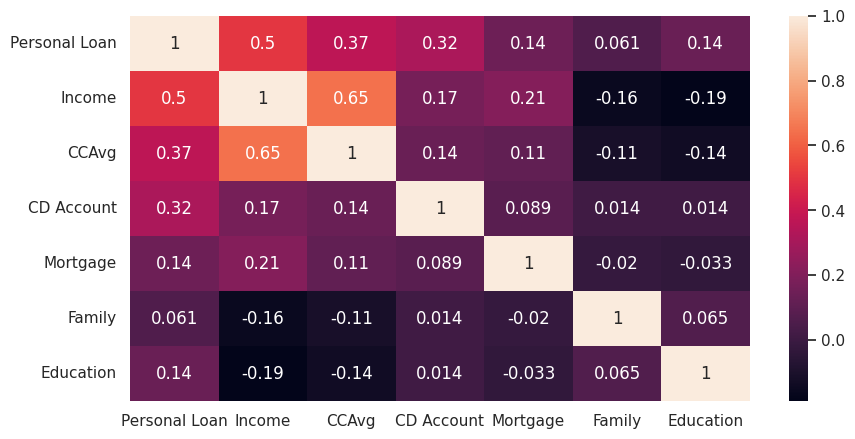

In [ ]:
# create a map the corelation
correlation= var_relevantes.corr()
f, ax=plt.subplots(figsize=(10,5))
sns.heatmap(correlation,annot= True)

<Axes: title={'center': 'Personal Loan and Credit Card'}, xlabel='Personal Loan', ylabel='Crdeit card'>

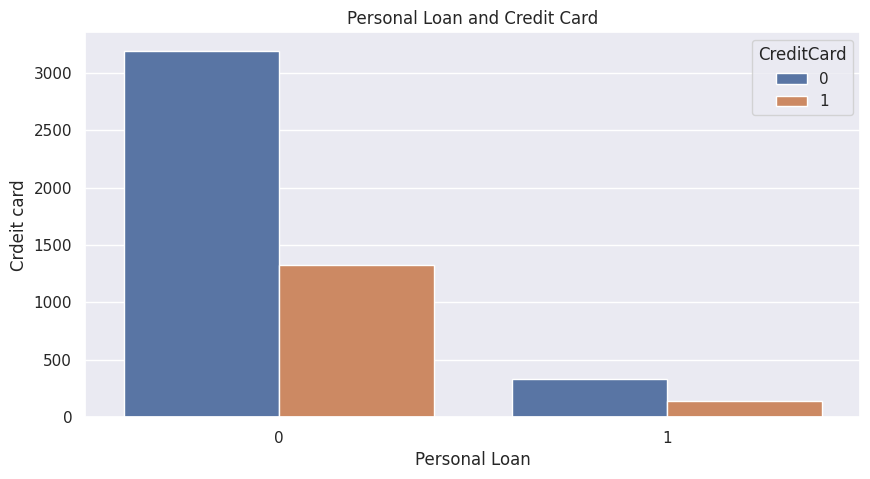

In [ ]:
#Analyzing personal loan and credit card columns with a countplot
plt.figure(figsize=(10,5))
plt.title('Personal Loan and Credit Card')
plt.ylabel('Crdeit card')
plt.xlabel('Personal Loan')
sns.countplot(x='Personal Loan', hue='CreditCard', data=df)

<Axes: title={'center': 'Education vs Loans'}, xlabel='Personal Loan', ylabel='Education'>

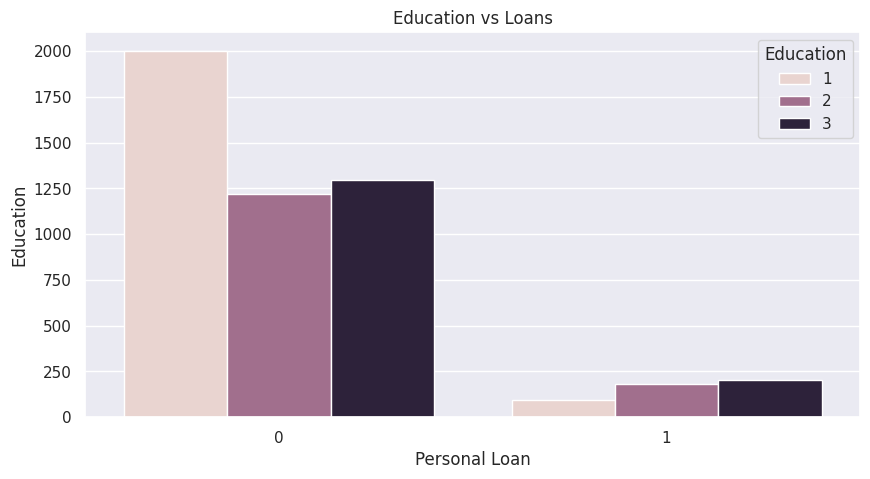

In [ ]:
# The education level vs Loans
plt.figure(figsize=(10,5))
plt.title("Education vs Loans")
plt.ylabel('Education')
plt.xlabel('Personal Loan')
sns.countplot(x='Personal Loan', hue='Education', data=df)

<h4>Verifying the distribution of the attribute income:</h4>

<ipython-input-18-8d07d0d3ba2b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], bins= 20)


<Axes: title={'center': 'Income variable distribution'}, xlabel='Income', ylabel='Density'>

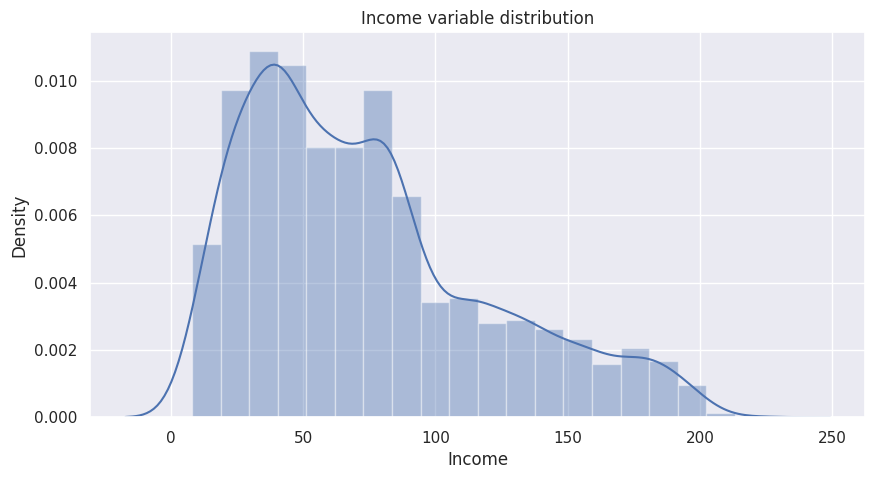

In [ ]:
#checking how the attribute income distribution looks like
plt.figure(figsize=(10,5))
plt.title('Income variable distribution')
sns.distplot(df['Income'], bins= 20)

In [ ]:
#let's check Skewness
from scipy import stats
skewness= stats.skew(df.Income)
print('valor skewness=', skewness)

valor skewness= 0.8410861846424931


<h4>OBS:</h4>
After verifying the distribution of the attribute income, we can see that the skewness is equal to 0.841, which means we have a positive skewness.
As we can see, the income of customers varies between 10 dollars to 250 dollars, but most customers have an income between 50 dollars and 100 dollars.

In [7]:
#checking how the attribute education distribution looks like
#plt.figure(figsize=(10,5))
#sns.distplot(df['Education'], bins= 20)

<h3>Summary of EDA.</h3>
<li>1- 70% of customers do not have any credit card with the bank, while only 29.4% of customers have a credit card with the bank.</li>
Regarding the last personal loan campaign, only 9.6% of customers responded, and 90.4% of customers did not respond.

<li>2- The dataset does not contain any missing values. This is beneficial for machine learning models, as they require clean data.</li>

<li>3- The variables most correlated to the target are the income variable, the ccavg variable, the CD account variable, the mortgage variable, and the education variable.</li>

<li>4- Most of customers did not respond to the last personal loan campaign, they don't have a credit card either.About 1400 of customers have responded to the last personal loan campaign.</li>

<li>5- Comparing the education levels of customers in the dataset, those with education level three were the most responsive to the last campaign.</li>

<h3>Data Preprocessing:</h3>
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step in creating a machine-learning model.

When creating a machine learning project, it is not always the case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.




### Applying the feature scaling:
To make sure features are on a similar scale we apply what we call the features scaling. More generally, when we are performing feature scaling, what we often want to do is get every feature into approximately the -1 to +1 range.


One of the most important transformations to machine learning, as every data scientist knows the Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.

This is the case for our dataset,that's why we are applying feature scaling on the data.


In [ ]:
# Appying the robust scaler
robust= RobustScaler()

In [6]:
#robust scaler
var_relevantes[["Income","CCAvg","Family","Education"]]=robust.fit_transform(var_relevantes[["Income","CCAvg","Family","Education"]])

In [ ]:
# Inspect the data
var_relevantes.head(3)

,Personal Loan,Income,CCAvg,CD Account,Mortgage,Family,Education
0,0,-0.254237,0.055556,0,0,1.0,-0.5
1,0,-0.508475,0.000000,0,0,0.5,-0.5
2,0,-0.898305,-0.277778,0,0,-0.5,-0.5


Create the input_X and the output_y that machine learning can learn a function that can map the input to the output based on example input-output pairs.

In [ ]:
#Let's create the input feature X and our target y
x= var_relevantes.drop(['Personal Loan'], axis= 1).values
x.shape

(5000, 6)

In [ ]:
y= var_relevantes['Personal Loan'].values
y.shape

(5000,)

<h4>Data Splitting, or commonly known as train-test split:</h4>
Data splitting is the act of partitioning available data into. Two portions, usually for cross-validatory purposes. One portion of the data is used to develop a predictive model. And the other to evaluate the model's performance.

In other word, Splitting the data into a training set and a test set is

In [ ]:
#let's split the data into training set and testing set
X_train, X_test, Y_train, Y_test= train_test_split(x, y, stratify=y,test_size= 0.3, random_state= 40)
X_train.shape, X_test.shape

((3500, 6), (1500, 6))

In [ ]:
print("the training set valor of the X_train is:{}".format(X_train.shape))
print("the testing set valor of the X_test is :{}".format(X_test.shape))


the training set valor of the X_train is:(3500, 6)
the testing set valor of the X_test is :(1500, 6)


<h4>Model Training:</h4>
<h4>Logistic Regression model.</h4>
Logistic regression is a linear model, it is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on. Multinomial logistic regression can model scenarios where there are more than two possible discrete outcomes. Logistic regression is a useful analysis method for classification problems, Where you are trying to determine if a new sample fits best into a category.


<h4>Evaluating Model Performance</h4>
The three main metrics used to evaluate a classification model are accuracy, precision, and recall. Accuracy is defined as the percentage of correct predictions for the test data. It can be calculated easily by dividing the number of correct predictions by the number of total predictions.

Result expected for the Performance of our classifiers
metrics----recall 50% and f1 score 70% for class one

In [ ]:
#Fitting The logistic Regression on the training set
logisticR= LogisticRegression(C=1, random_state=42)
logisticR.fit(X_train,Y_train)

LogisticRegression(C=1, random_state=42)

In [ ]:
#Validation of logistic regresssion on testing set
prediction= logisticR.predict(X_test)

In [ ]:
# Calculate the accuracy of model
Lr_acc= accuracy_score(Y_test,prediction)
print("Model accuracy is",Lr_acc)

Model accuracy is 0.952


<h4>Obs:</h4>
The accuracy for the model is : 0.95

In [ ]:
# Calculate the probability
Lr_proba= logisticR.predict_proba(X_test)
print(Lr_proba)

[[9.73589502e-01 2.64104983e-02]
 [9.96091930e-01 3.90807032e-03]
 [9.99772793e-01 2.27206639e-04]
 ...
 [7.05330546e-01 2.94669454e-01]
 [9.98470276e-01 1.52972355e-03]
 [9.97323025e-01 2.67697467e-03]]


<h4>Confusion matrix & Classification Report:</h4>

The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data. It can only be determined if the true values for test data are known. The matrix itself can be easily understood, but the related terminologies may be confusing. Since it shows the errors in the model performance in the form of a matrix, hence also known as an error matrix.

In [ ]:
# Verify the model's performance using the classification report metric
Lr_cl_report= classification_report(Y_test,prediction)
print(Lr_cl_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1356
           1       0.83      0.62      0.71       144

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



<h4>Hyperparameter Tuning Regression Logistic with GridSearch.</h4>

Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.

In [ ]:
# create the dictionary of parameters.
params={'C':[0.01,0.1,1],
         'penalty':['l2','l1'],
         'solver':['liblinear'],
         'random_state':[50,100,150]
        }

<h4>GridSerach model.</h4>
Instantie the gridsearch class and the repeated stratified class.

In [ ]:
# Instantie the repeatedstratifiedkfold
kfold= RepeatedStratifiedKFold(n_splits=10,n_repeats=3)

# Instantie the gridsearch model
gridCV= GridSearchCV(logisticR,param_grid= params,cv=kfold, scoring="roc_auc", refit= True )

# Fitting the model
gridCV.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=LogisticRegression(C=1, random_state=42),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'random_state': [50, 100, 150],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [ ]:
# Best estimator
best_est= gridCV.best_estimator_
print(best_est)

LogisticRegression(C=0.1, random_state=50, solver='liblinear')


In [ ]:
# Make the prediction with best estimator
pred=best_est.predict(X_test)

In [ ]:
# calculate the roc auc score
auc= roc_auc_score(Y_test,best_est.predict_proba(X_test)[:,1])
print(auc)

0.9554500573582432


<h4>OBS:</h4>
a ROC AUC of 0.95 suggests that the model is highly effective in correctly classifying the classes and has excellent performance in distinguishing between the positive and negative classes.

Obs: with best estimator the precision valor increased ,from 0.83 to 0.90 .

<Axes: title={'center': 'Confusion Matrix'}>

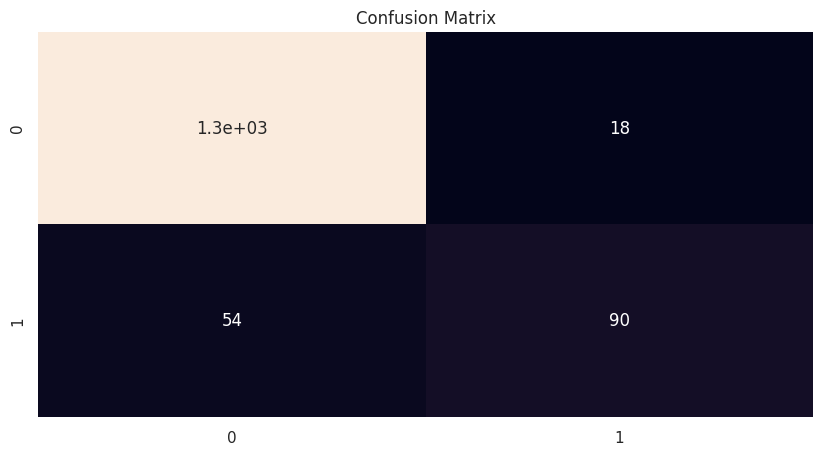

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title("Confusion Matrix")
cm= confusion_matrix(Y_test, prediction)
sns.heatmap(cm, annot=True, cbar= False)

The confusion matrix indicates that we have 1303+94 correct prediction and 50 + 19 incorrect prediction


<h3>Random Forest Model:</h3>

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and improve the performance of the model.

In [ ]:
# creating a list for the max depth with 6 valor
max_List=[2,4,6,8]

# Instantie the estimator Random Forest Classifier & Fitting on the training set
for max_depth in max_List:
  rf= RandomForestClassifier(n_estimators=200,max_depth= max_depth)
  rf.fit(X_train,Y_train)
  pred_y= rf.predict(X_test)
  accuracy= accuracy_score(Y_test,pred_y)

  #Classification report
  cl_report= classification_report(Y_test,pred_y)
  print("The classification report:",cl_report)
  #print("The accuracy for each max depth valor:",accuracy)

The classification report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1356
           1       1.00      0.19      0.32       144

    accuracy                           0.92      1500
   macro avg       0.96      0.59      0.64      1500
weighted avg       0.93      0.92      0.90      1500

The classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.98      0.83      0.90       144

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500

The classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96    

<Axes: title={'center': 'Confusion matrix'}>

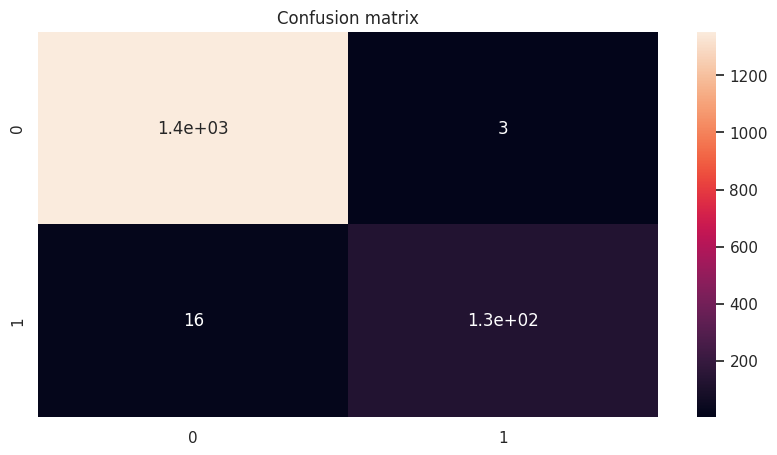

In [ ]:
# plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title("Confusion matrix")
cm= confusion_matrix(Y_test, pred_y)
sns.heatmap(cm, annot=True, cbar= True)

</h4>Random Forest Hyperparameters Tuning with Gridsearch.</h4>

In [ ]:
#Instantie the repeated stratified kfold class
kfold= RepeatedStratifiedKFold(n_splits= 5, n_repeats=1)

# Creating the dictionary of parameters
params = [
 {'n_estimators': [100,200,300,350],
  'random_state':[50,100,150,200],
  'max_depth': [2, 4, 6,8]
  }
 ]

 #Instantie the gridsearch model
gridcv = GridSearchCV(rf, param_grid= params, cv= kfold,scoring='roc_auc', refit=True)
#Fitting the gridsearch on the training data
gridcv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(max_depth=8, n_estimators=200),
             param_grid=[{'max_depth': [2, 4, 6, 8],
                          'n_estimators': [100, 200, 300, 350],
                          'random_state': [50, 100, 150, 200]}],
             scoring='roc_auc')

In [ ]:
# Best estimator
best_rf_est= gridcv.best_estimator_
print(best_rf_est)

RandomForestClassifier(max_depth=8, n_estimators=350, random_state=150)


In [ ]:
best_rf_param= gridcv.best_params_
print(best_rf_param)

{'max_depth': 8, 'n_estimators': 350, 'random_state': 150}


In [ ]:
# calculate the probability on the test set with best estimator
rf_proba= best_rf_est.predict_proba(X_test)
print(rf_proba)

[[9.94893886e-01 5.10611386e-03]
 [9.99501095e-01 4.98904898e-04]
 [9.99849752e-01 1.50248287e-04]
 ...
 [9.63036136e-01 3.69638638e-02]
 [9.99290018e-01 7.09982089e-04]
 [9.98867872e-01 1.13212753e-03]]


In [ ]:
# calculate the roc auc score
auc_grid= roc_auc_score(Y_test,best_rf_est.predict_proba(X_test)[:,1])
print(auc_grid)

0.9977824893477548


<h4>OBS</h4>
a ROC AUC of 0.99 suggests that the model is highly effective in correctly classifying the classes and has excellent performance in distinguishing between the positive and negative classes.

<h4>XGBoost Model:</h4>

XGBoost stands for “Extreme Gradient Boosting”, where the term “Gradient Boosting” originates from the paper Greedy Function Approximation:
The gradient boosted trees has been around for a while, and there are a lot of materials on the topic. This tutorial will explain boosted trees in a self-contained and principled way using the elements of supervised learning. We think this explanation is cleaner, more formal, and motivates the model formulation used in XGBoost.


<h4>Elements of Supervised Learning</h4>
XGBoost is used for supervised learning problems, where we use the training data (with multiple features) 
to predict a target variable 
Before we learn about trees specifically, let us start by reviewing the basic elements in supervised learning.

For more information about the XGboost model: [XGBOOST](https://xgboost.readthedocs.io/en/stable/tutorials/model.html)

In [ ]:
#Fitting The xgboost on the training set
# Instantie the XGboost model
counter= 0
maxDepth= [2,4,6,8]
for maxdepth in maxDepth:
  xg= XGBClassifier(n_estimators=200,random_state=40, max_depth= maxdepth)
  xg.fit(X_train,Y_train)
  pred_xg= xg.predict(X_test)

  #Classification report
  cl_report= classification_report(Y_test,pred_xg)
  print("The classification report:",cl_report)

The classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.93      0.90      0.92       144

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500

The classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.92      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

The classification report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.94      0.94      0.94       144

    accuracy                           0.99      1500
   macro avg       0.97      0.97      0.97    

<h4>Improving our model</h4>
<h4>XGBoost Model Tuning:</h4>

What is hyperparameter tuning and why it is important?
Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.


In [ ]:
#Instantie the repeated stratified
kfold= RepeatedStratifiedKFold(n_splits= 10, n_repeats=3)

# Instantie the GridSearch model
params = [
 {'n_estimators': [300,200,100]},
 {'learning_rate':[0.01,0.1,0.2], 'max_depth': [2, 4, 6,8]}
 ]
gridcv = GridSearchCV(xg, param_grid= params, cv= kfold,scoring='roc_auc', refit=True)
#Fitting
gridcv.fit(X_train,Y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, impo...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=8,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=40, ...),
             param_grid=[{'n_estimators': [300, 200, 100]},
                         {'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [2, 4, 6, 8]}],
             scoring='roc_auc')

In [ ]:
# the best estimator
best_estimator= gridcv.best_estimator_
best_estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=40, ...)

In [ ]:
# calculate the roc auc score
auc_xgb= roc_auc_score(Y_test,best_estimator.predict_proba(X_test)[:,1])
print(auc_xgb)

0.997895157325467


<h4>OBS</h4>
a ROC AUC of 0.99 suggests that the model is highly effective in correctly classifying the classes and has excellent performance in distinguishing between the positive and negative classes.

<Axes: title={'center': 'The confusion Matrix'}>

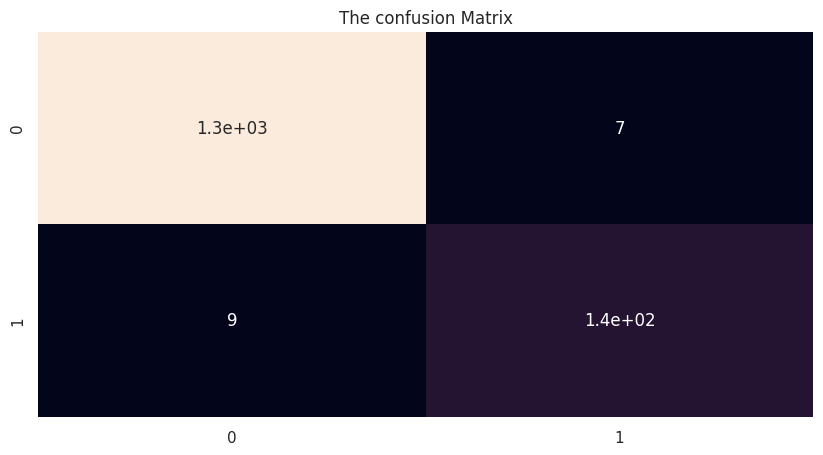

In [ ]:
# Prediction with the best estimator
prediction= best_estimator.predict(X_test)

#plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title("The confusion Matrix")
cm= confusion_matrix(Y_test, prediction)
sns.heatmap(cm, annot=True, cbar= False)

<h4>Saving Machine Learning Models for Future Use</h4>
<h4>Phase six, the last phase in the CRISP-DM methodology.</h4>
The final phase involves deploying the model into a real-world environment. This can be as simple as generating a report or as complex as implementing a repeatable data mining process. Key tasks include:

Planning deployment
Monitoring and maintenance
Reviewing the project
Finalizing the project

<h4>Why Save Models?</h4>
Saving models is crucial for several reasons:

Efficiency: Re-training models every time can be time-consuming and computationally expensive. Saving models ensures faster predictions.
Consistency: Saving models preserves their behavior, avoiding potential variations that might arise during retraining.
Scalability: Trained models can be deployed across different systems without the need to retrain them locally.
Collaboration: Saved models enable collaboration among team members who can use the same model for consistent results.

<h4>Pickle and Joblib</h4>
Python’s built-in pickle library and the third-party library joblib provide simple ways to serialize Python objects, including machine learning models.

In [ ]:
#Appllying pickle to save the model
import pickle
#data= {'model':probability, 'scaler':robust,}
with open('rf2.pkl', 'wb') as file:
    pickle.dump(best_rf_est,file)

Conclusion:

After following the six phases of the crisp-pm methodology, and having trained several machine learning algorithms, I got a lot of important insights
about customers' relationship with the Bank. All the models had some good performance, so we selected the Random Forest and XGBoost.
With a recall of 92% for class one, and
with a probability of 9.99% for class one.

In the EDA phase, we have seen that most of the  customers don't have any credit cards in the bank
*Most customers don't have any CD Account in the bank.
we can suggest
the Bank manager to offer more credit card programs to the customers, and asks them to get their CD Account in the bank.

